<a href="https://colab.research.google.com/github/yakamurii/series_temporais_com_prophet-/blob/main/series_temporais_com_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from prophet import Prophet

In [ ]:
dados = yf.download('JNJ', start='2020-01-01', end='2023-12-31', progress=False)
dados

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,145.869995,146.020004,145.080002,145.970001,130.099152,5777000
2020-01-03,143.500000,145.369995,143.000000,144.279999,128.592896,5752400
2020-01-06,144.000000,144.199997,142.850006,144.100006,128.432419,7731300
2020-01-07,144.009995,145.449997,141.380005,144.979996,129.216736,7382900
2020-01-08,144.869995,145.979996,143.699997,144.960007,129.198929,6605800
...,...,...,...,...,...,...
2023-12-22,155.250000,156.529999,155.020004,155.460007,154.288544,3798500
2023-12-26,155.000000,156.350006,154.850006,156.139999,154.963409,4170000
2023-12-27,155.500000,156.520004,155.419998,156.350006,155.171844,5288100


In [ ]:
dados = dados.reset_index()
dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,145.869995,146.020004,145.080002,145.970001,130.099152,5777000
1,2020-01-03,143.500000,145.369995,143.000000,144.279999,128.592896,5752400
2,2020-01-06,144.000000,144.199997,142.850006,144.100006,128.432419,7731300
3,2020-01-07,144.009995,145.449997,141.380005,144.979996,129.216736,7382900
4,2020-01-08,144.869995,145.979996,143.699997,144.960007,129.198929,6605800
...,...,...,...,...,...,...,...
1001,2023-12-22,155.250000,156.529999,155.020004,155.460007,154.288544,3798500
1002,2023-12-26,155.000000,156.350006,154.850006,156.139999,154.963409,4170000
1003,2023-12-27,155.500000,156.520004,155.419998,156.350006,155.171844,5288100
1004,2023-12-28,156.000000,157.240005,155.990005,156.580002,155.400101,4377500


In [ ]:
dados_treino = dados[dados['Date'] < '2023-07-31']
dados_teste = dados[dados['Date'] >= '2023-07-31']

In [ ]:
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date':'ds', 'Close':'y'})
dados_prophet_treino

,ds,y
0,2020-01-02,145.970001
1,2020-01-03,144.279999
2,2020-01-06,144.100006
3,2020-01-07,144.979996
4,2020-01-08,144.960007
...,...,...
894,2023-07-24,171.080002
895,2023-07-25,172.389999
896,2023-07-26,172.720001
897,2023-07-27,173.690002


In [ ]:
modelo = Prophet(weekly_seasonality=True,
                 yearly_seasonality=True,
                 daily_seasonality=True)
modelo.add_country_holidays(country_name='US')
modelo.fit(dados_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp03r7on1l/82djn5ma.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp03r7on1l/qkwyy1_c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12223', 'data', 'file=/tmp/tmp03r7on1l/82djn5ma.json', 'init=/tmp/tmp03r7on1l/qkwyy1_c.json', 'output', 'file=/tmp/tmp03r7on1l/prophet_modelf45j8h_g/prophet_model-20240416172507.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:25:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:25:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
futuro = modelo.make_future_dataframe(periods=150)
previsao = modelo.predict(futuro)

In [ ]:
previsao


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,145.085378,144.873856,155.872635,145.085378,145.085378,0.0,0.0,0.0,0.0,...,0.079957,0.079957,0.079957,4.225676,4.225676,4.225676,0.0,0.0,0.0,150.296143
1,2020-01-03,145.068997,145.139494,155.063435,145.068997,145.068997,0.0,0.0,0.0,0.0,...,0.219033,0.219033,0.219033,4.025687,4.025687,4.025687,0.0,0.0,0.0,150.218849
2,2020-01-06,145.019856,143.723118,154.160939,145.019856,145.019856,0.0,0.0,0.0,0.0,...,-0.184895,-0.184895,-0.184895,3.383184,3.383184,3.383184,0.0,0.0,0.0,149.123277
3,2020-01-07,145.003476,143.772454,154.751047,145.003476,145.003476,0.0,0.0,0.0,0.0,...,-0.016263,-0.016263,-0.016263,3.169304,3.169304,3.169304,0.0,0.0,0.0,149.061649
4,2020-01-08,144.987096,143.462396,154.275298,144.987096,144.987096,0.0,0.0,0.0,0.0,...,0.128451,0.128451,0.128451,2.962556,2.962556,2.962556,0.0,0.0,0.0,148.983234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,2023-12-21,149.301752,143.891981,166.082180,139.958875,159.616388,0.0,0.0,0.0,0.0,...,0.079957,0.079957,0.079957,4.699009,4.699009,4.699009,0.0,0.0,0.0,154.985850
1045,2023-12-22,149.250163,144.008524,166.814816,139.798682,159.652551,0.0,0.0,0.0,0.0,...,0.219033,0.219033,0.219033,4.828522,4.828522,4.828522,0.0,0.0,0.0,155.202850
1046,2023-12-23,149.198573,144.028452,165.690247,139.645561,159.687774,0.0,0.0,0.0,0.0,...,-0.113141,-0.113141,-0.113141,4.927806,4.927806,4.927806,0.0,0.0,0.0,154.918370
1047,2023-12-24,149.146983,143.995779,165.797514,139.423418,159.737005,0.0,0.0,0.0,0.0,...,-0.113141,-0.113141,-0.113141,4.995307,4.995307,4.995307,0.0,0.0,0.0,154.934281


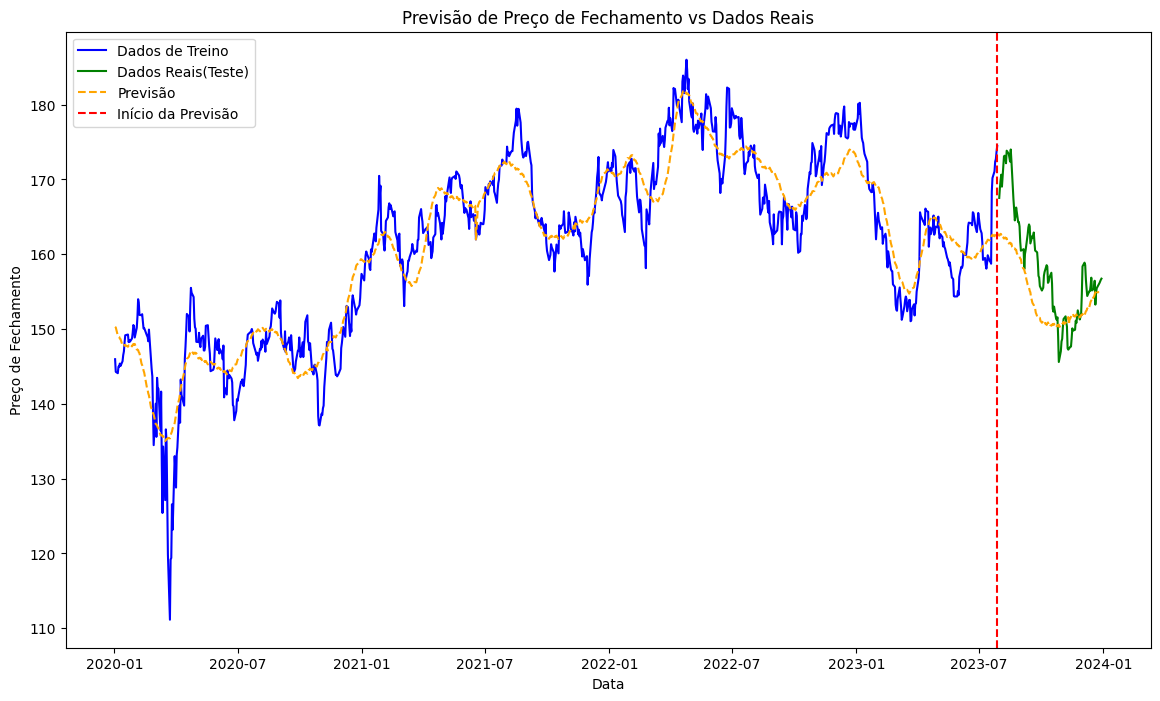

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino', color='blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados Reais(Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()